In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
from utils import feature_list

data_path = '../data/'

#define some variables to be able to run it as a whole 
use_custom_font = True
save = True
show = False
load_big = False


In [3]:
#uncomment for loading full data and saving it in a asmaller file
"""b = np.load(f"{data_path}x_data_bkg.npy")
np.save(f"{data_path}x_data_bkg.npy",b[:100000])
b = []"""

'b = np.load(f"{data_path}x_data_bkg.npy")\nnp.save(f"{data_path}x_data_bkg.npy",b[:100000])\nb = []'

In [7]:
#load signal and bg and label them
bg = np.load(f"{data_path}bg_small.npy")
sig = np.load(f"{data_path}sig_small.npy")

lab_bg = np.array([-1 for i in range(np.shape(bg)[0])])
lab_sig = np.array([1 for i in range(np.shape(sig)[0])])

In [8]:
data = np.concatenate([bg,sig])
lab = np.concatenate([lab_bg,lab_sig])
#test shuffle to later use it in training and testing
data, lab = shuffle(data,lab)

In [9]:
#calculate correlation matrices of bg and signal
#inorder to solve the classification problem they have to be different
bgc = np.corrcoef(bg.T)
sigc = np.corrcoef(sig.T)
c = np.corrcoef(data.T)


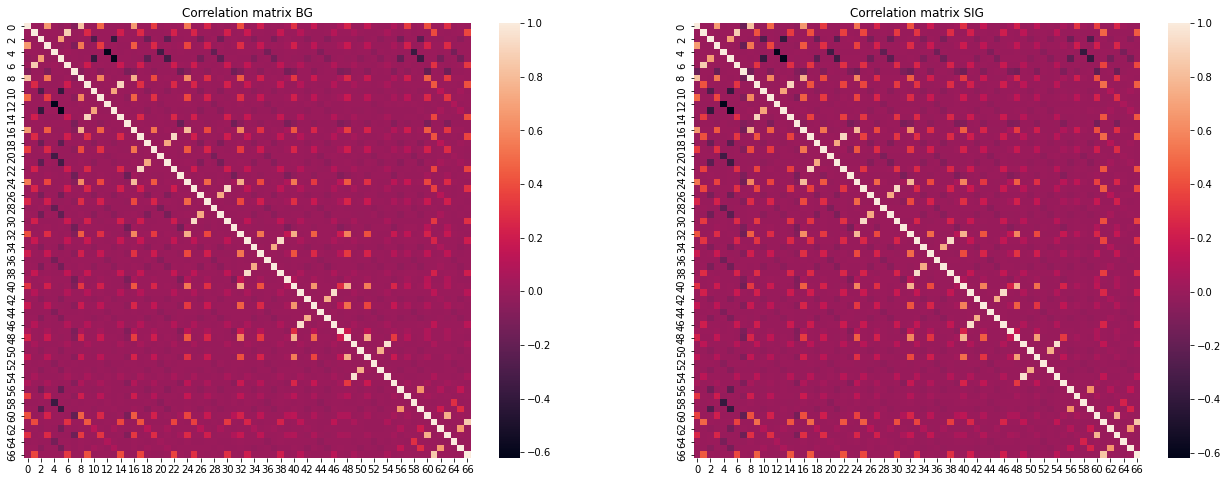

In [13]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.title('Correlation matrix BG')
sns.heatmap(bgc)
plt.subplot(1,2,2)
plt.title('Correlation matrix SIG')
sns.heatmap(sigc)
plt.show()

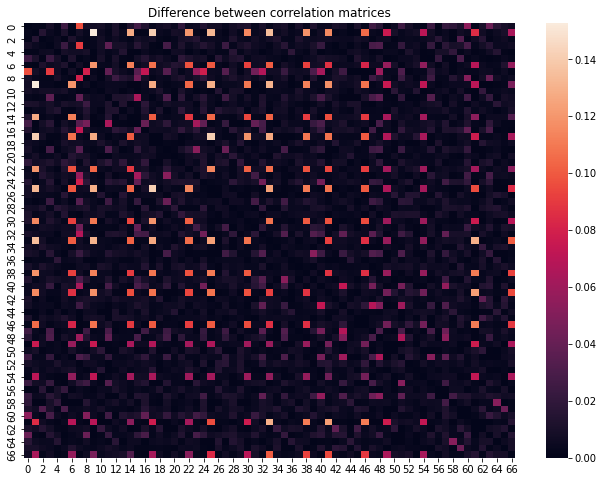

In [17]:
plt.figure(figsize=(11,8))
plt.title('Difference between correlation matrices')
sns.heatmap(np.abs(bgc-sigc))
plt.show()

In [18]:
#experimental things
"""import matplotlib.colors as colors
plt.figure(figsize = (18,9))
plt.subplot(1,2,1)
_ = plt.hist2d(sig[:,1],sig[:,9], bins=(30,30), norm = colors.LogNorm() )
plt.subplot(1,2,2)
_ = plt.hist2d(bg[:,1],bg[:,9], bins=(30,30), norm = colors.LogNorm())
"""

'import matplotlib.colors as colors\nplt.figure(figsize = (18,9))\nplt.subplot(1,2,1)\n_ = plt.hist2d(sig[:,1],sig[:,9], bins=(30,30), norm = colors.LogNorm() )\nplt.subplot(1,2,2)\n_ = plt.hist2d(bg[:,1],bg[:,9], bins=(30,30), norm = colors.LogNorm())\n'

In [19]:
"""from sklearn.decomposition import PCA, KernelPCA

model = PCA(n_components=32)
#model = KernelPCA(n_components = 16,kernel='')
model.fit(data[:1000])

bgt = model.transform(bg)
sigt = model.transform(sig)
sns.heatmap(np.corrcoef(bgt.T))"""


"from sklearn.decomposition import PCA, KernelPCA\n\nmodel = PCA(n_components=32)\n#model = KernelPCA(n_components = 16,kernel='')\nmodel.fit(data[:1000])\n\nbgt = model.transform(bg)\nsigt = model.transform(sig)\nsns.heatmap(np.corrcoef(bgt.T))"

findfont: Font family ['IBM-Plex-Mono'] not found. Falling back to DejaVu Sans.
<ipython-input-20-e1acaa183220>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6), dpi=(100))


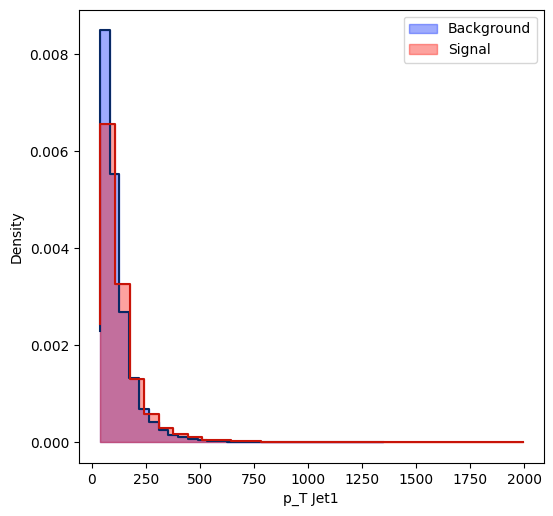

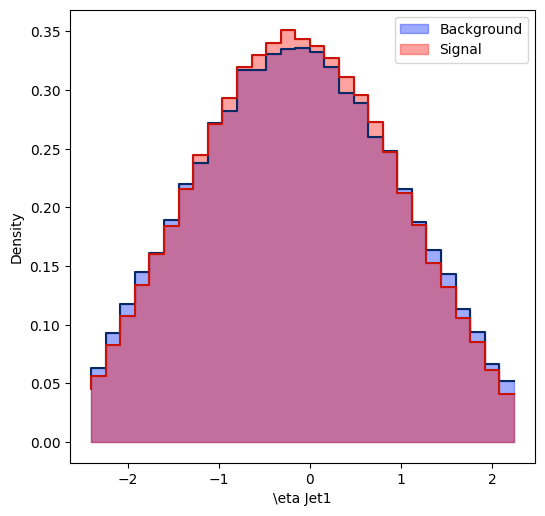

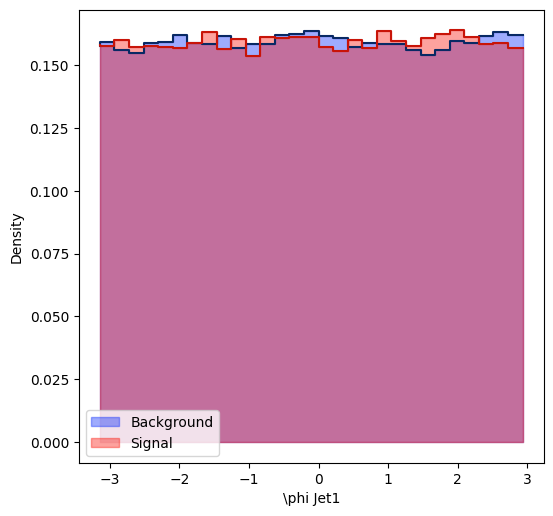

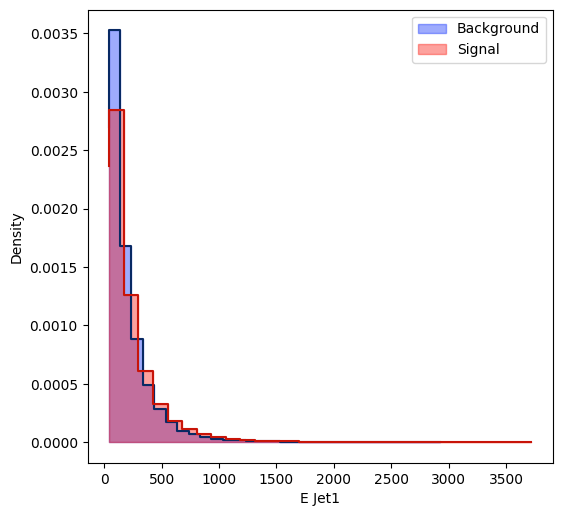

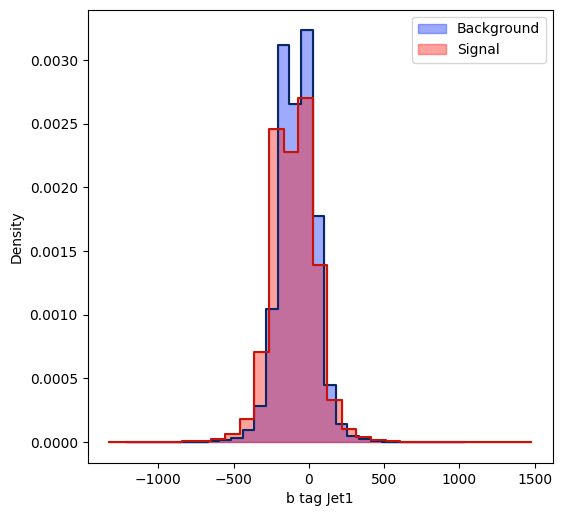

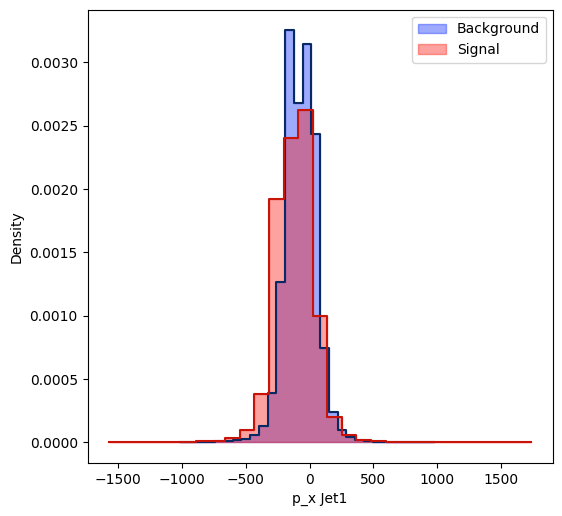

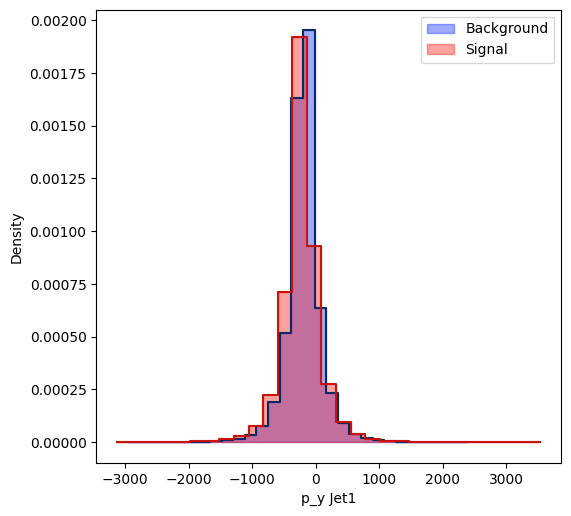

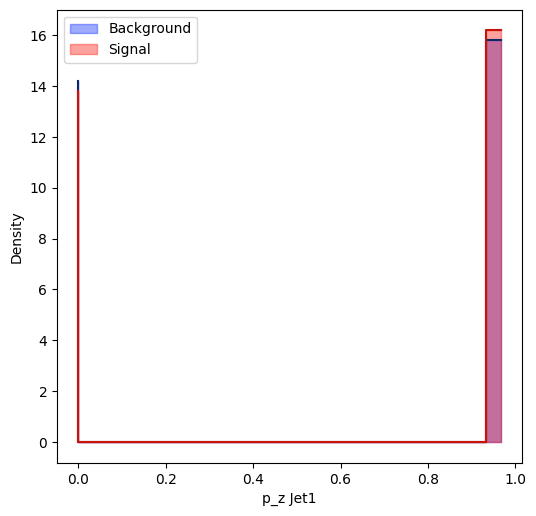

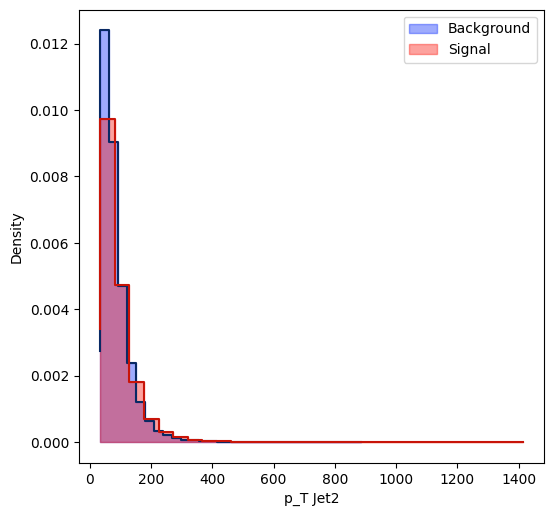

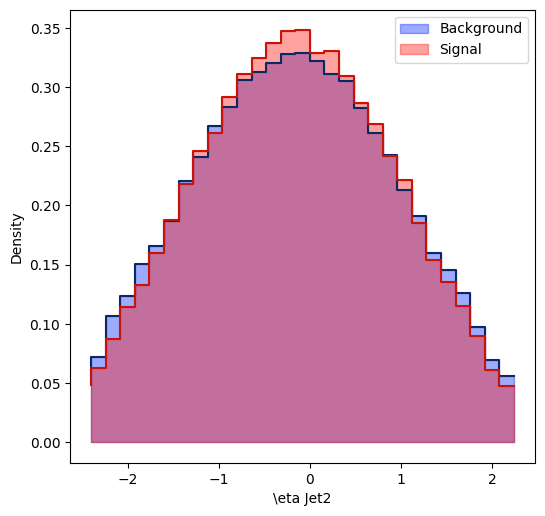

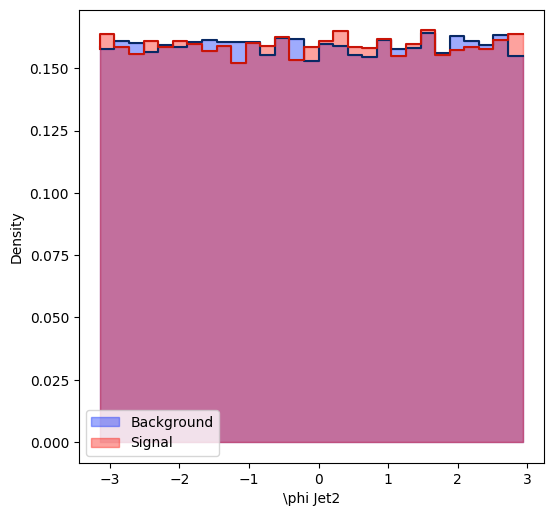

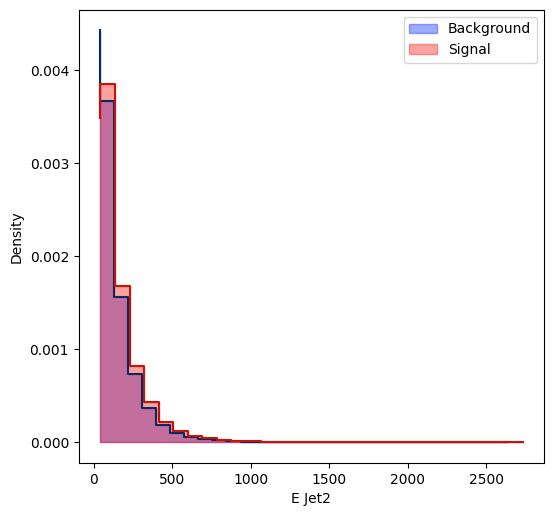

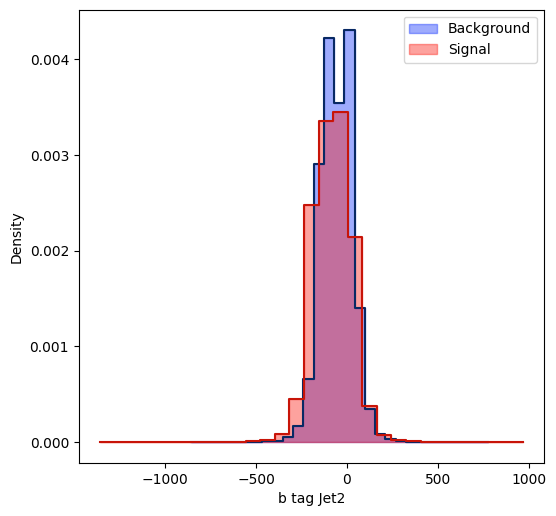

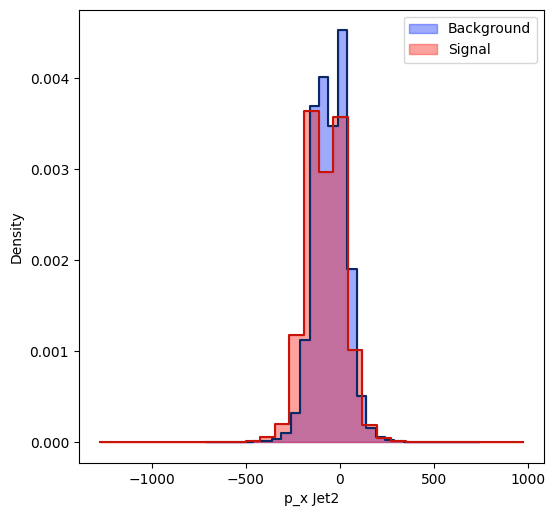

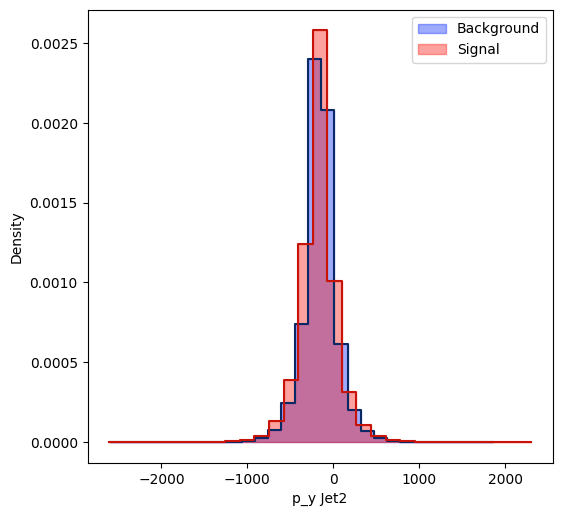

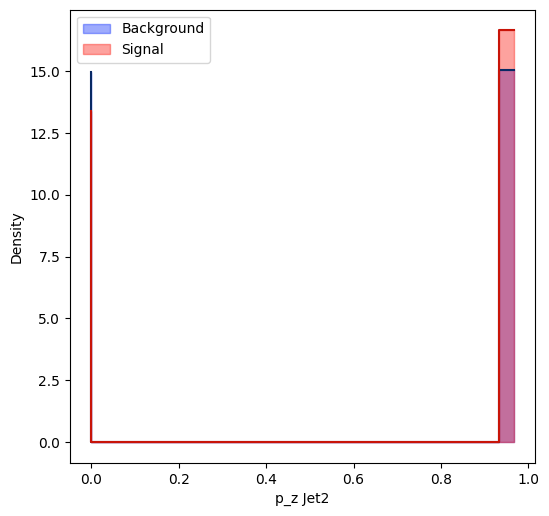

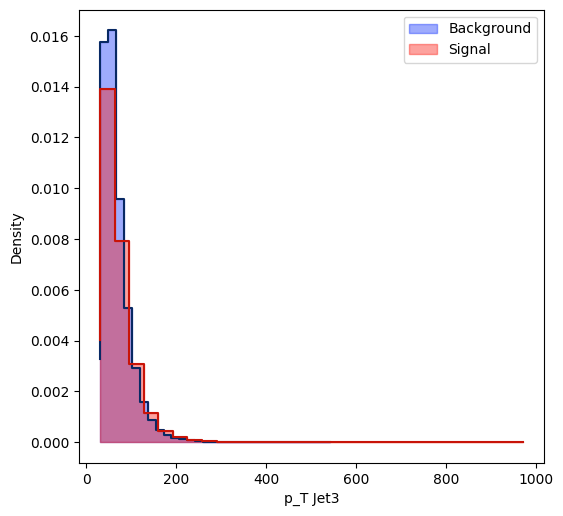

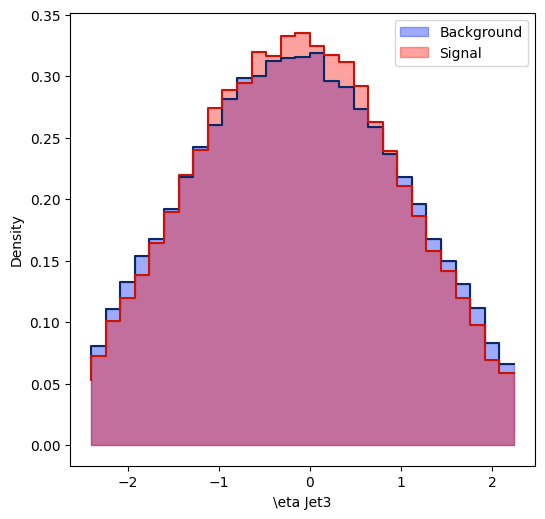

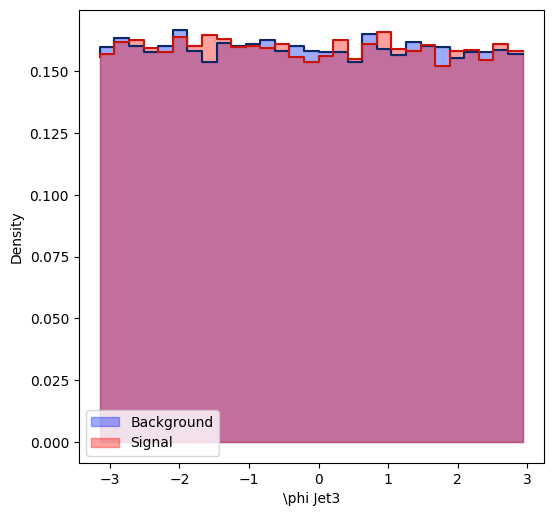

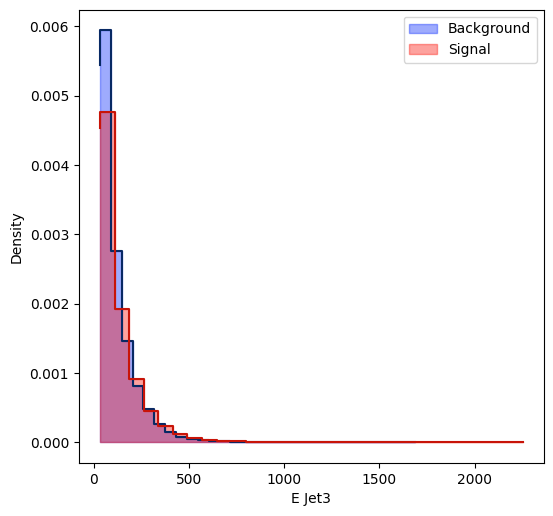

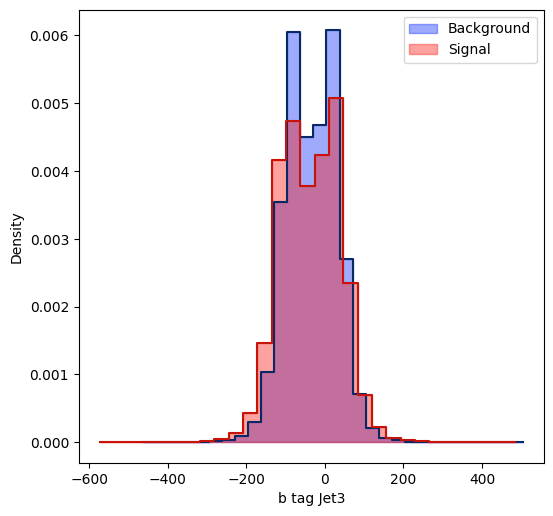

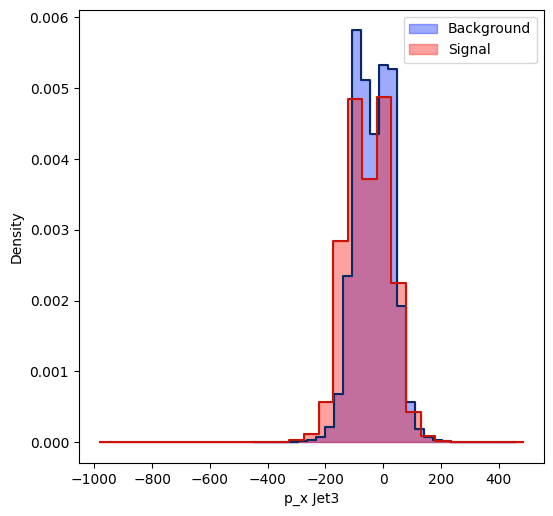

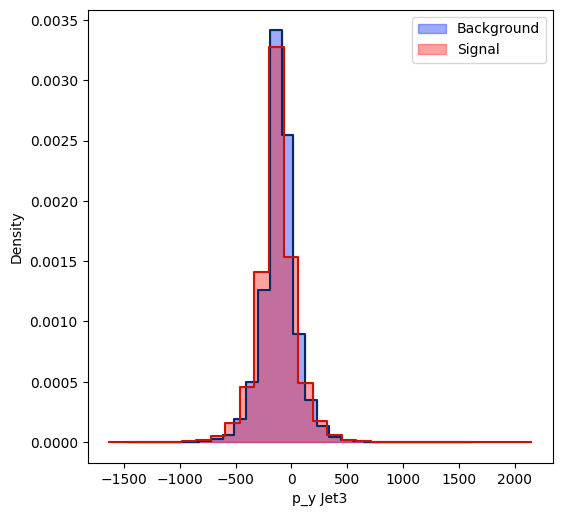

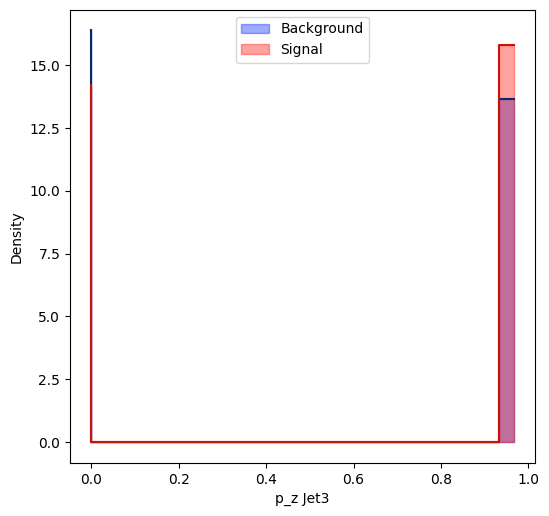

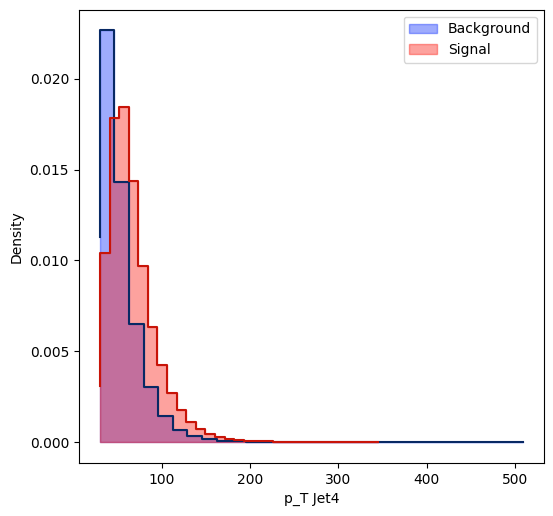

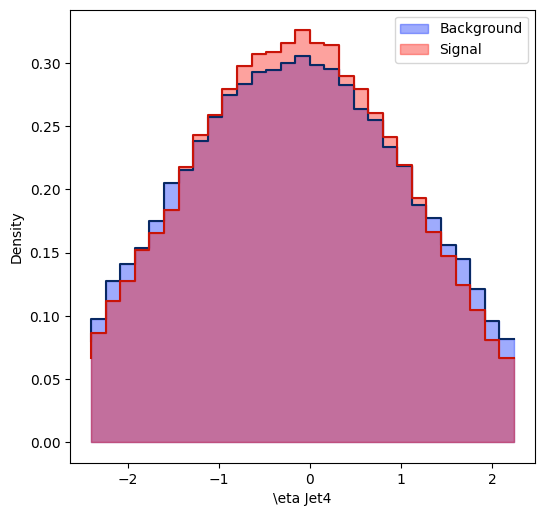

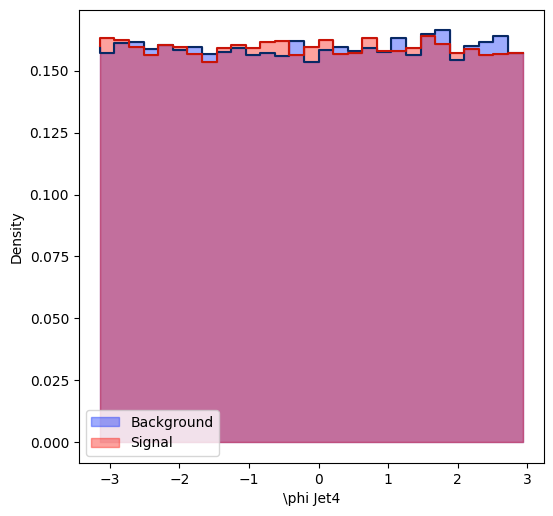

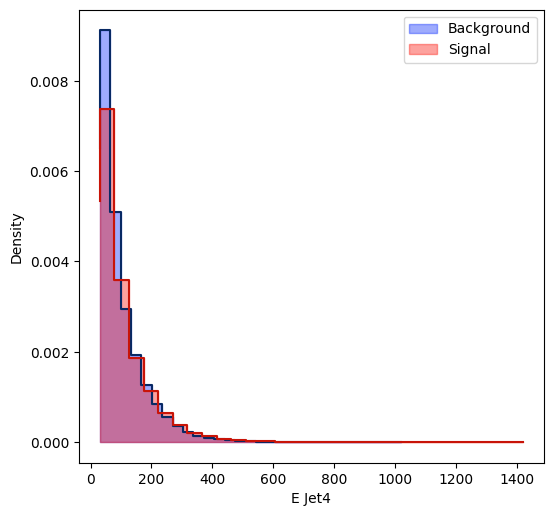

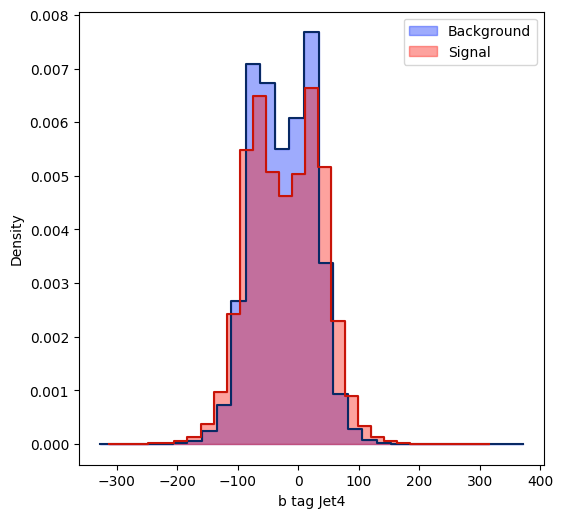

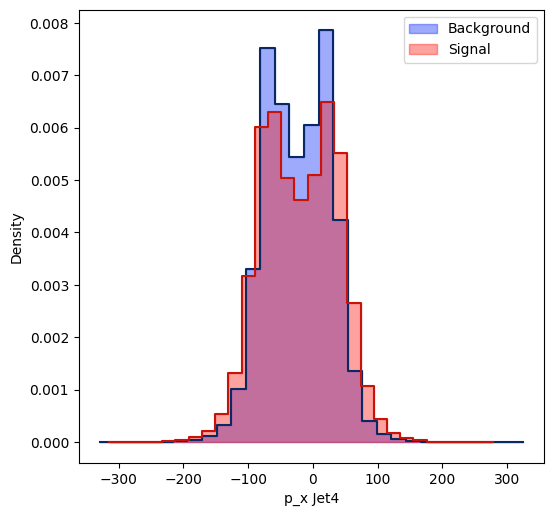

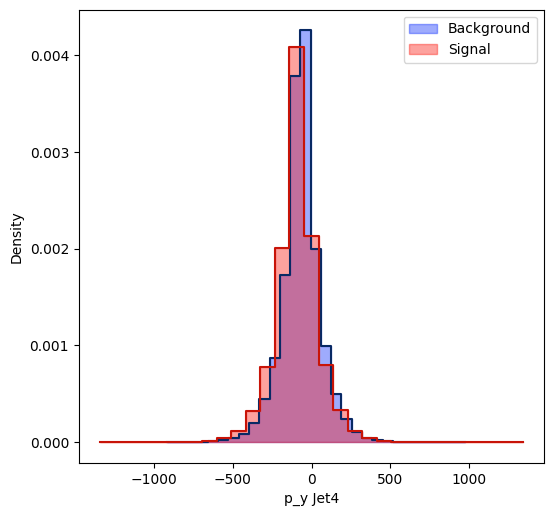

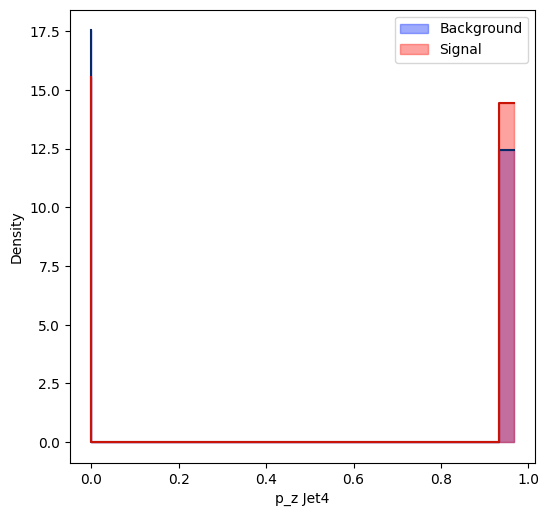

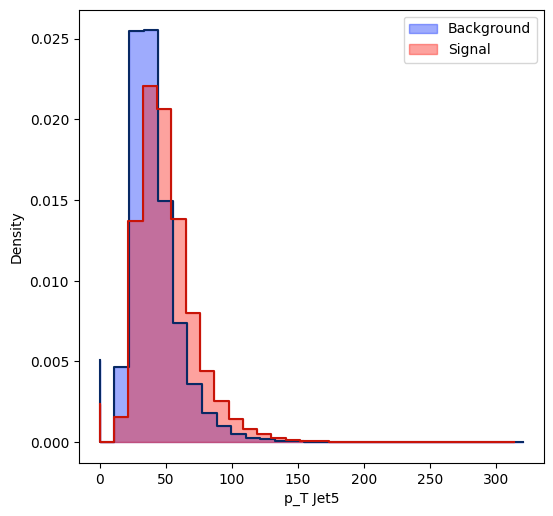

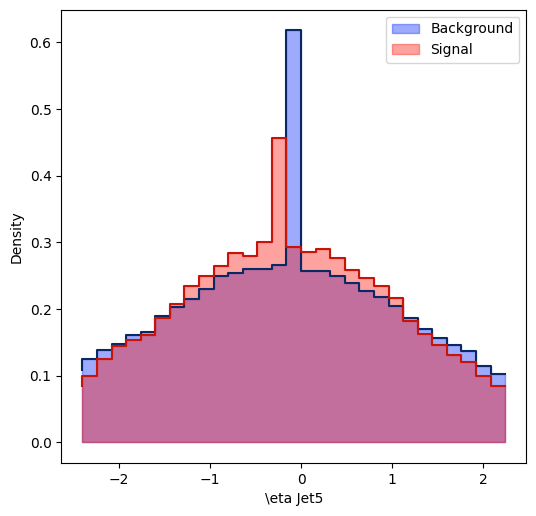

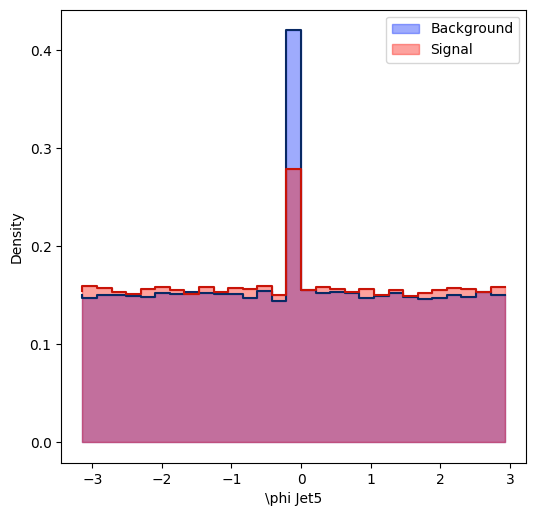

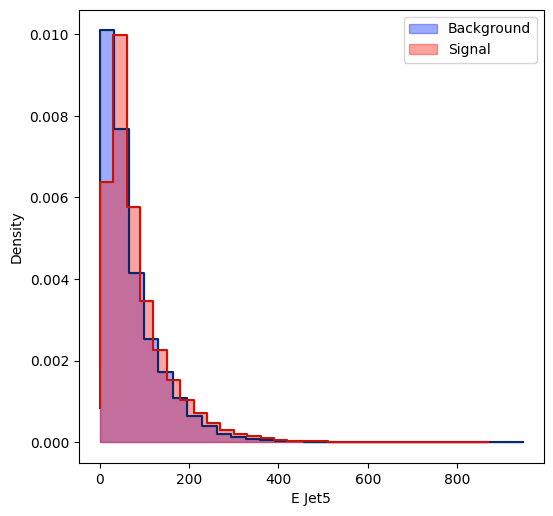

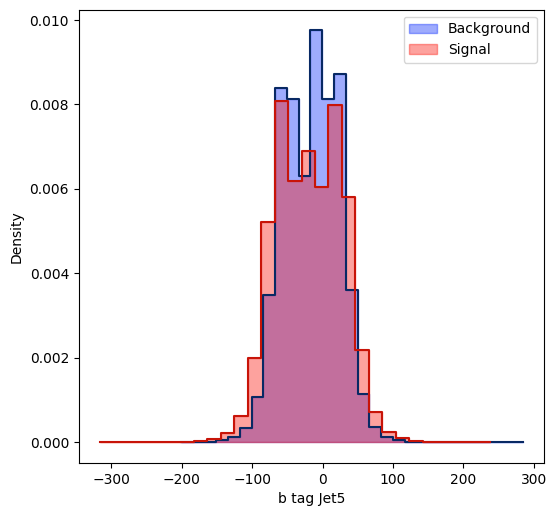

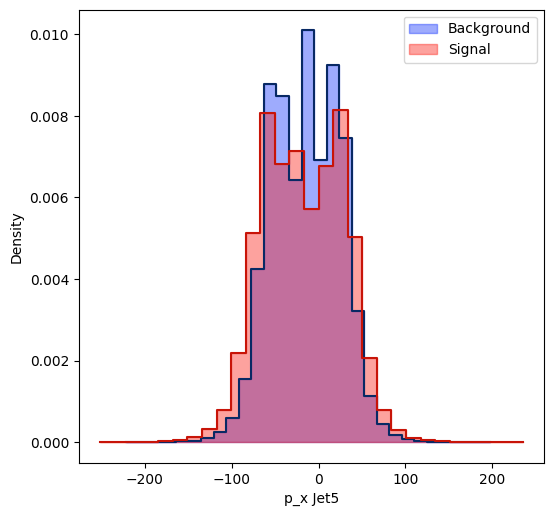

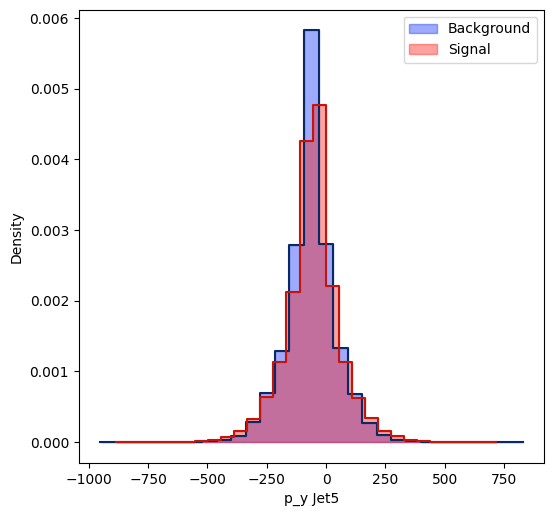

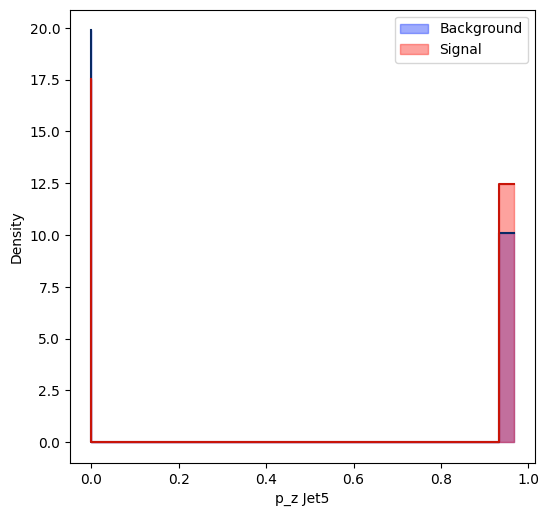

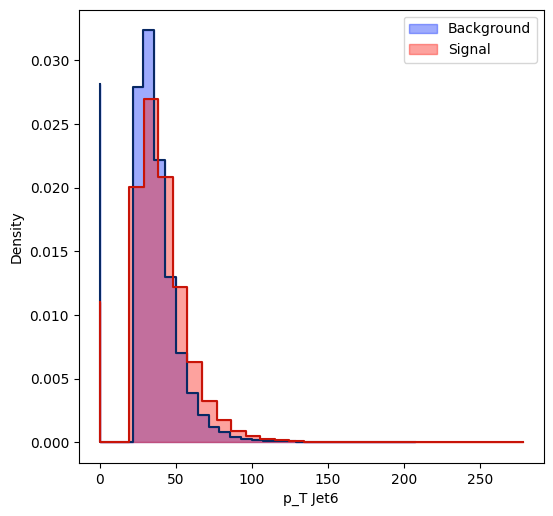

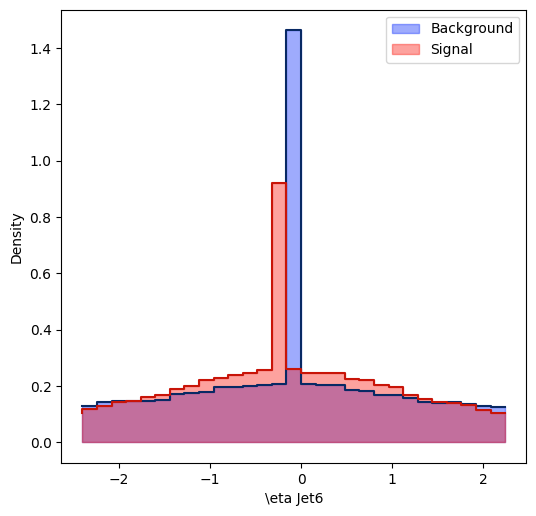

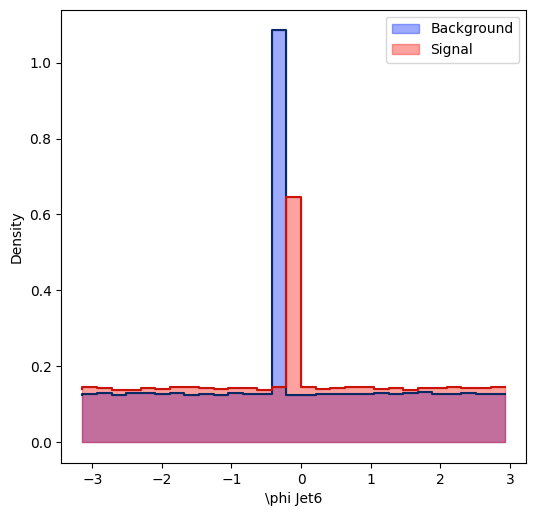

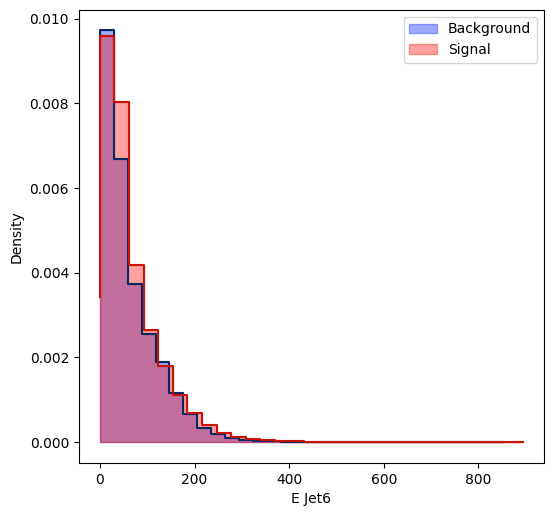

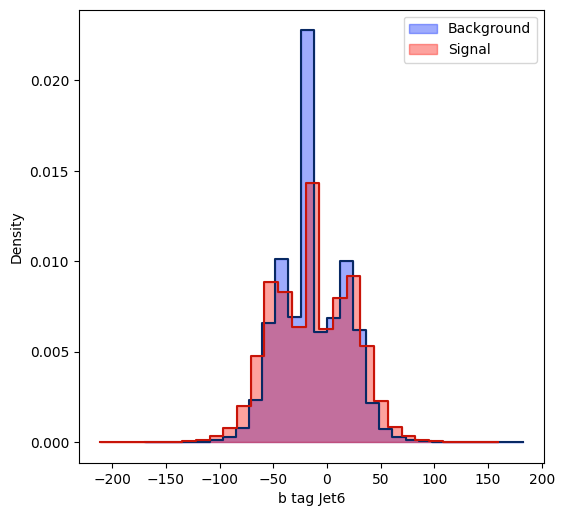

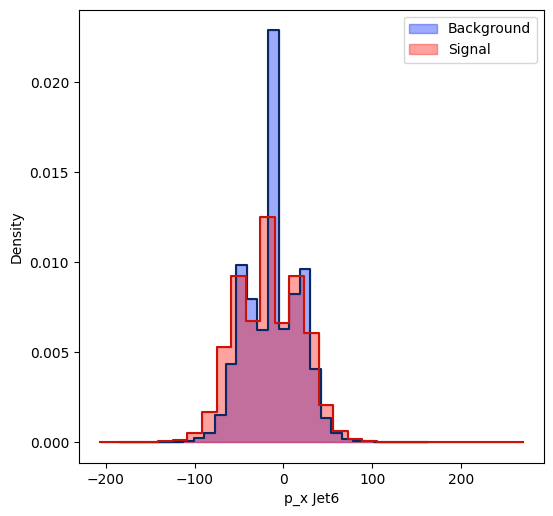

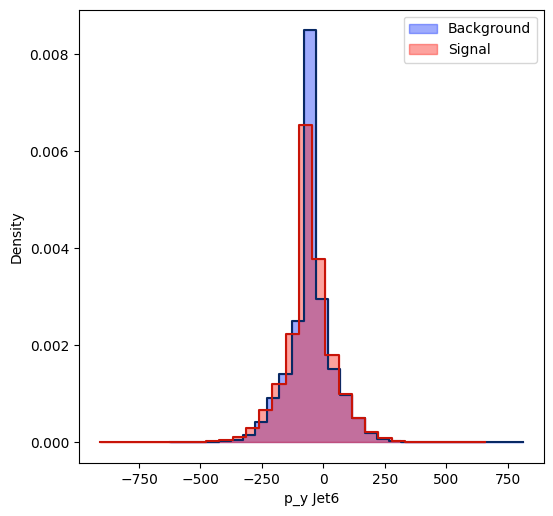

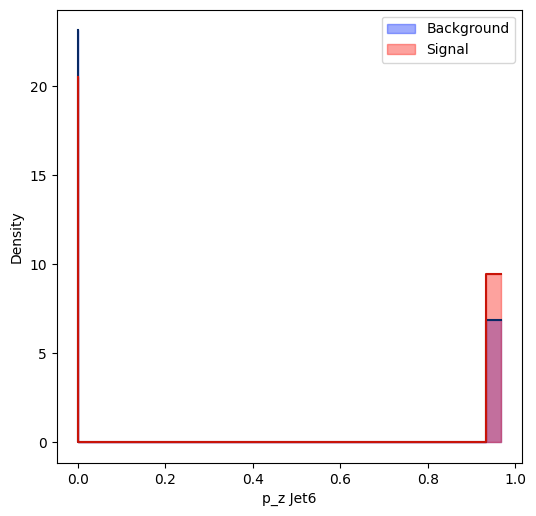

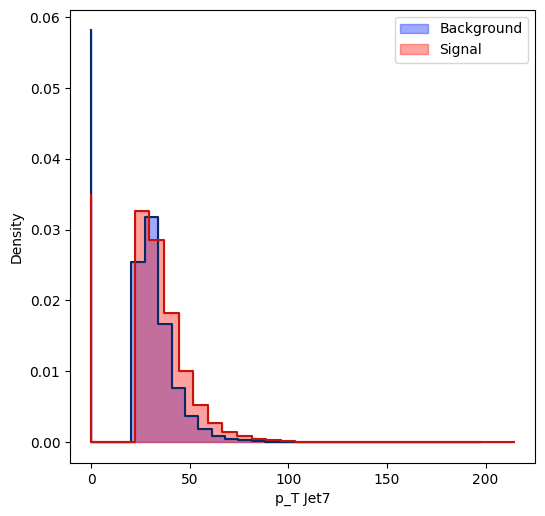

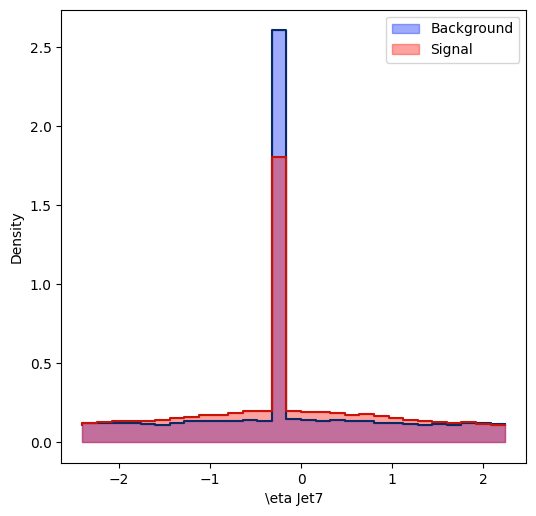

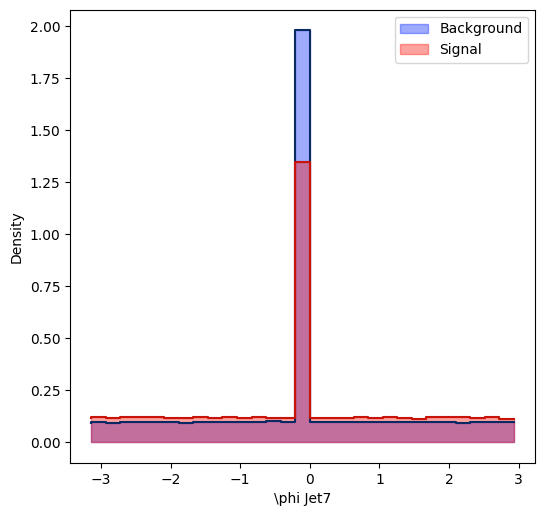

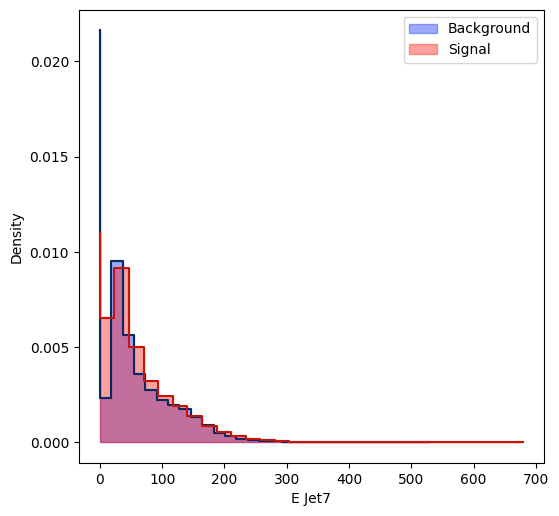

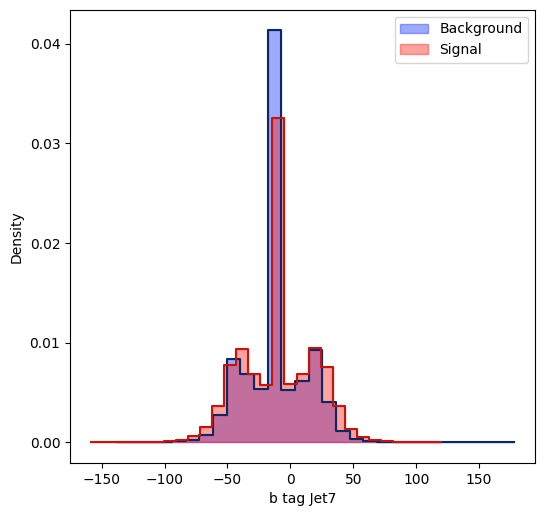

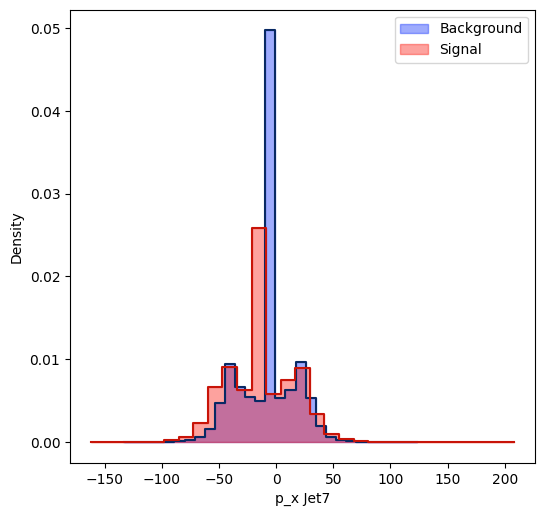

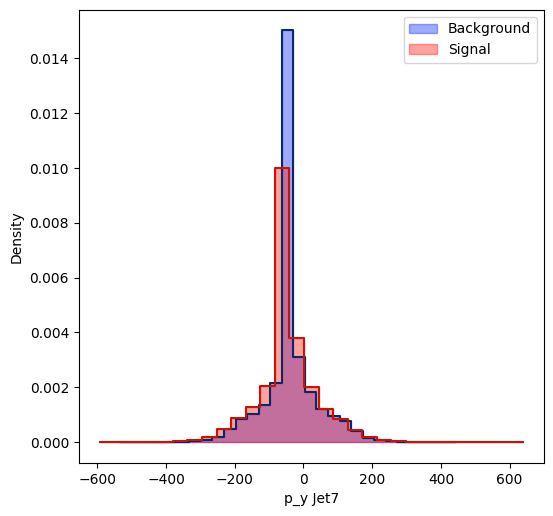

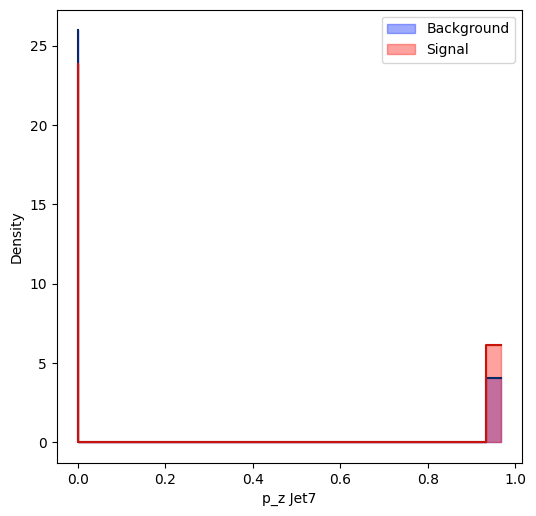

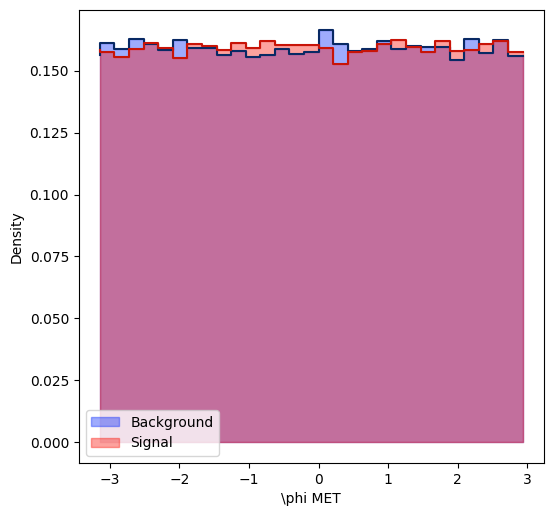

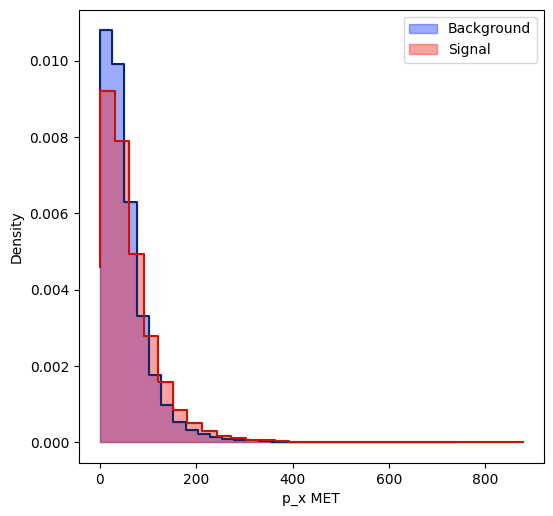

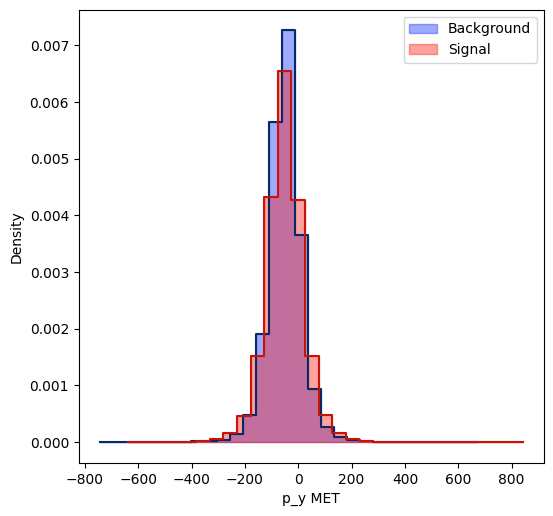

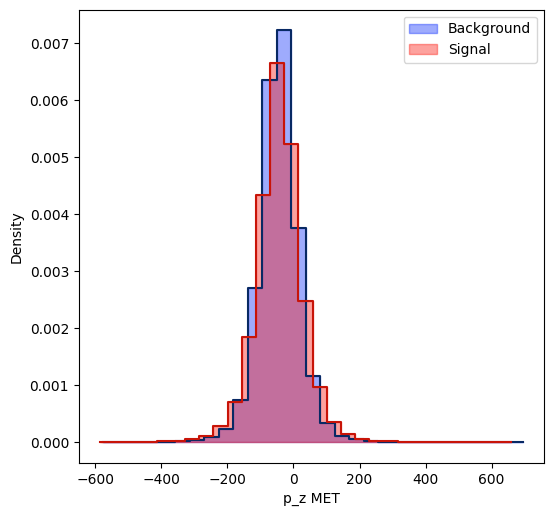

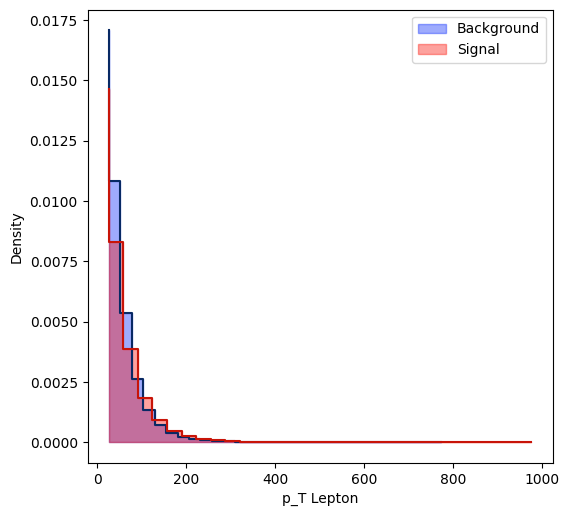

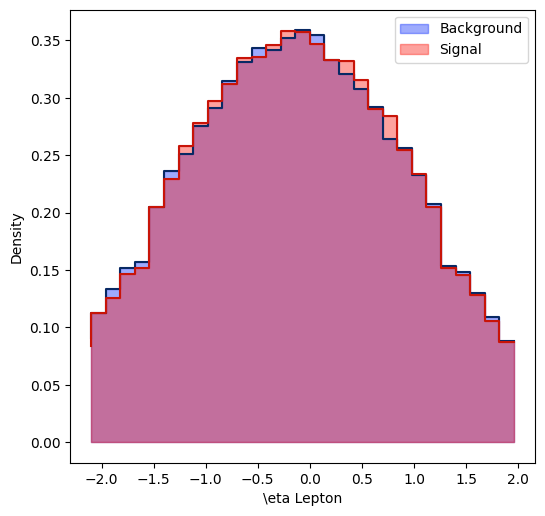

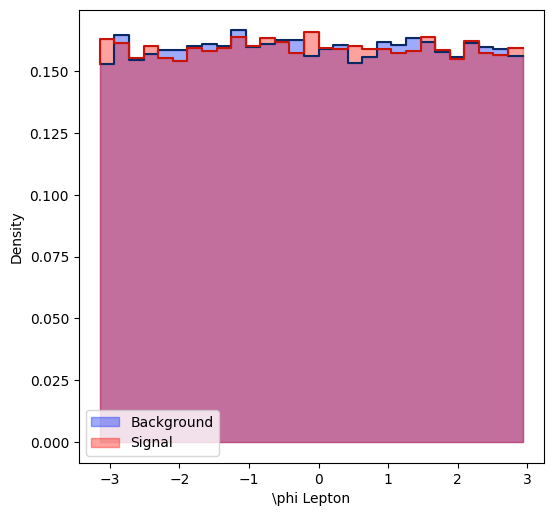

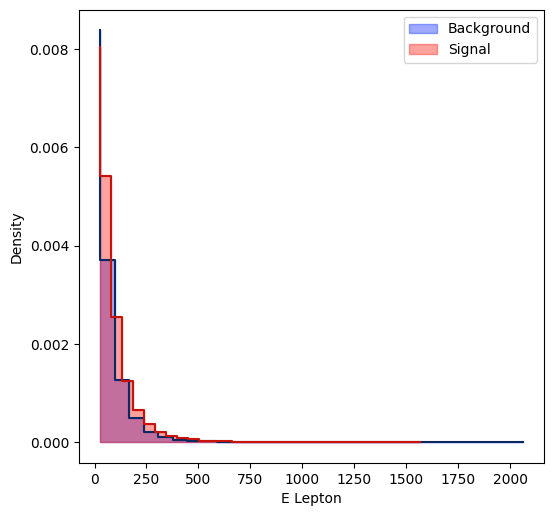

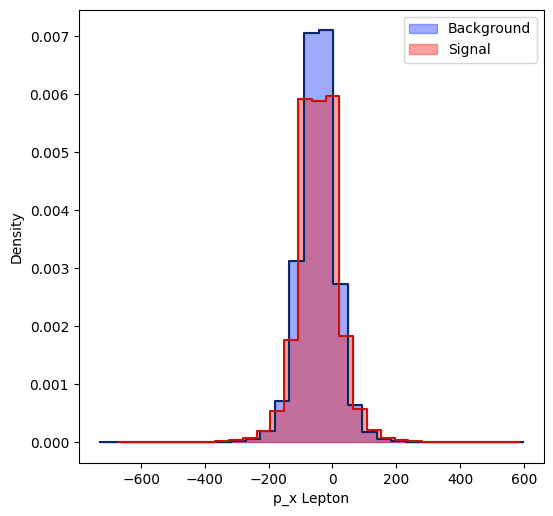

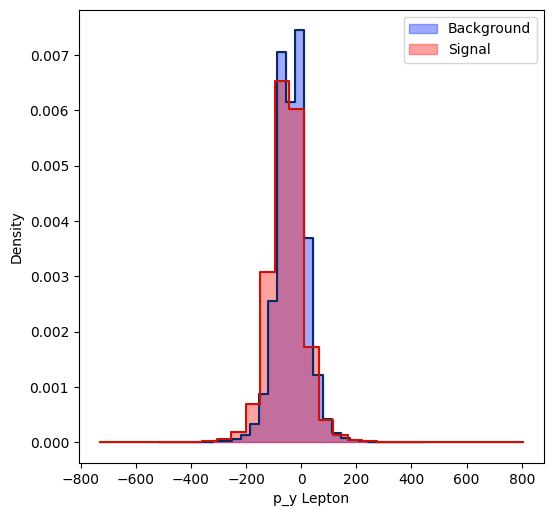

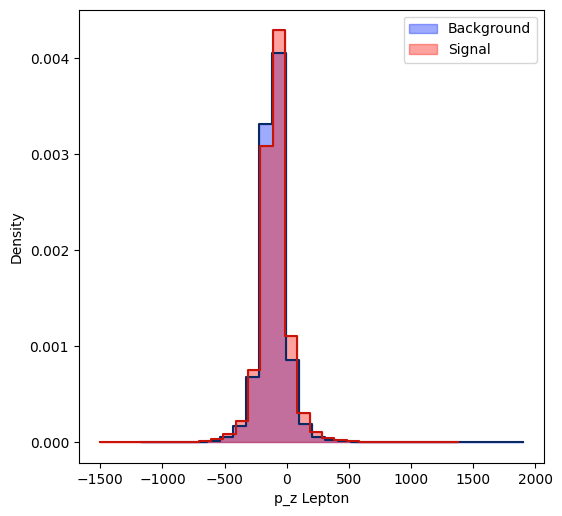

In [20]:
#data exploration plots
if use_custom_font:
  import matplotlib.font_manager as font_manager
  font_dir = ['/usr/share/fonts/truetype/ibm']
  for font in font_manager.findSystemFonts(font_dir):
      font_manager.fontManager.addfont(font)

plt.rcParams.update({
  "font.family": "IBM-Plex-Mono",
  #"font.sans-serif": ["IBM-Plex-Mono"]
})

if load_big:
  bg = np.load(f"{data_path}x_data_bkg.npy")
  sig = np.load(f"{data_path}x_data_sig.npy")

for i in range(len(feature_list)):
  feature = i
  color_bg = tuple(np.array([8,41,252,100])/ 255.)
  color_sig = tuple(np.array([252,20,8,100])/ 255.)
  hist_bg = np.histogram(bg[:,feature],bins = 30, density=True)
  hist_sig = np.histogram(sig[:,feature],bins = 30, density=True)

  plt.figure(figsize=(6,6), dpi=(100))
  plt.step(hist_bg[1][:-1],hist_bg[0], color = tuple(np.array([8,41,100,255])/ 255.))
  plt.step(hist_sig[1][:-1],hist_sig[0], color=tuple(np.array([200,20,8,255])/ 255.))
  plt.fill_between(hist_bg[1][:-1],hist_bg[0], np.zeros_like(hist_bg[0]), color=color_bg, step = 'pre', label = 'Background')
  plt.fill_between(hist_sig[1][:-1],hist_sig[0], np.zeros_like(hist_sig[0]), color=color_sig, step = 'pre', label = 'Signal')
  plt.legend()
  plt.ylabel('Density')
  plt.xlabel(feature_list[feature], )
  if save:
    plt.savefig(f"img/{feature_list[i]}.jpg")
  if show:
    plt.show()
